In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import label_binarize

import warnings
warnings.filterwarnings("ignore")

C:\Users\Acer\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [71]:
df = pd.read_excel('C:/Users/Acer/Downloads/rspo/df_2020.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 97 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Unnamed: 0.1                          1020 non-null   int64  
 1   Unnamed: 0                            1020 non-null   int64  
 2   submission_status                     97 non-null     object 
 3   member_name                           1020 non-null   object 
 4   membership_num                        1020 non-null   object 
 5   membership_sector                     1020 non-null   object 
 6   membership_category                   1020 non-null   object 
 7   country                               1020 non-null   object 
 8   use_palm_oil                          1020 non-null   object 
 9   select_descr_activity                 1020 non-null   object 
 10  palm_oil_activity                     1020 non-null   object 
 11  palm_oil_activity

In [5]:
df = df[(df['membership_sector'] == 'Consumer Goods Manufacturers')]

In [4]:
df2 = pd.read_excel("parsed___2020.xlsx")

In [6]:
df2 = df2[(df2['membership_sector'] == 'Consumer Goods Manufacturers')]

In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 753 entries, 0 to 752
Data columns (total 83 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Unnamed: 0                            753 non-null    int64  
 1   submission_status                     87 non-null     object 
 2   member_name                           753 non-null    object 
 3   membership_num                        753 non-null    object 
 4   membership_sector                     753 non-null    object 
 5   membership_category                   753 non-null    object 
 6   country                               753 non-null    object 
 7   use_palm_oil                          753 non-null    object 
 8   select_descr_activity                 753 non-null    object 
 9   palm_oil_activity                     753 non-null    object 
 10  palm_oil_activity2                    44 non-null     object 
 11  subsidiary_palm_oil

In [8]:
df['vol_total'] = df2['vol_palm_oil']+df2['vol_palm_kernel']+df2['vol_palm_kernel_expeller']+df2['vol_palm_der/fraction']

In [9]:
df['uptake_binned_cor']=pd.cut(x=df['cert_palm_oil_uptake'], bins=[-1,0.25,0.5,0.75,2], labels=[3, 2, 1,0])
#df['uptake_binned_cor']  = df['cert_palm_oil_uptake'].apply(lambda x:0 if x<1 else 1 )

In [10]:
df['uptake_binned_cor']

0      0
1      0
2      0
3      0
4      0
      ..
748    0
749    3
750    0
751    3
752    2
Name: uptake_binned_cor, Length: 753, dtype: category
Categories (4, int64): [3 < 2 < 1 < 0]

<AxesSubplot:xlabel='uptake_binned_cor', ylabel='count'>

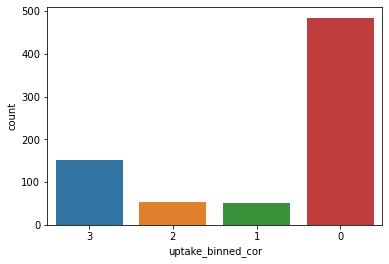

In [11]:
sns.countplot(x=df["uptake_binned_cor"])

In [13]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'submission_status', 'member_name',
       'membership_num', 'membership_sector', 'membership_category', 'country',
       'use_palm_oil', 'select_descr_activity', 'palm_oil_activity',
       'palm_oil_activity2', 'subsidiary_palm_oil', 'market', 'declare_volume',
       'vol_palm_oil', 'vol_palm_kernel', 'vol_palm_kernel_expeller',
       'vol_palm_der/fraction', '%palm_oil_der/fract',
       '%palm_kernel_der/fract', 'estimate_dist_total_EU',
       'estimate_dist_total_NUS', 'estimate_dist_total_MY',
       'estimate_dist_total_INDO', 'estimate_dist_total_CH',
       'estimate_dist_total_INDIA', 'estimate_dist_total_LUS',
       'estimate_dist_total_AFR', 'estimate_dist_total_ROW',
       'vol_cert_mill_cspo', 'vol_cert_mill_cspko', 'vol_cert_mill_cspke',
       'vol_cert_mill_palm_der/fraction', 'vol_cert_ind_cspo',
       'vol_cert_ind_cspko', 'vol_cert_ind_cspke',
       'vol_cert_ind_palm_der/fraction', 'vol_cert_mb_cspo',
       'vol_cert_mb

In [14]:
df1 = df[['membership_category','country_sub',
          'palm_oil_activity_num','num_market','percent_mill', 'percent_ind', 'percent_mb', 'percent_sg',
          'percent_ip','estimate_dist_total_EU',
       'estimate_dist_total_NUS', 'estimate_dist_total_MY',
       'estimate_dist_total_INDO', 'estimate_dist_total_CH',
       'estimate_dist_total_INDIA', 'estimate_dist_total_LUS',
       'estimate_dist_total_AFR', 'estimate_dist_total_ROW','estimate_dist_cert_EU','estimate_dist_cert_NUS', 'estimate_dist_cert_MY',
          'estimate_dist_cert_INDO', 'estimate_dist_cert_CH',
          'estimate_dist_cert_INDIA', 'estimate_dist_cert_LUS',
          'estimate_dist_cert_AFR', 'estimate_dist_cert_ROW','year_use_cert_oil_yes', 'year_achieve_supplycert_yes',
          'year_use_cert_ismb_yes', 'year_use_100%cert_supplychain_yes','vol_total','use_rspo_trademark','uptake_binned_cor']]


In [15]:
df_num = df1[['palm_oil_activity_num', 'num_market',
       'percent_mill', 'percent_ind', 'percent_mb', 'percent_sg', 'percent_ip','estimate_dist_total_EU',
       'estimate_dist_total_NUS', 'estimate_dist_total_MY',
       'estimate_dist_total_INDO', 'estimate_dist_total_CH',
       'estimate_dist_total_INDIA', 'estimate_dist_total_LUS',
       'estimate_dist_total_AFR', 'estimate_dist_total_ROW',
       'estimate_dist_cert_EU', 'estimate_dist_cert_NUS',
       'estimate_dist_cert_MY', 'estimate_dist_cert_INDO',
       'estimate_dist_cert_CH', 'estimate_dist_cert_INDIA',
       'estimate_dist_cert_LUS', 'estimate_dist_cert_AFR',
       'estimate_dist_cert_ROW','vol_total']]

In [22]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 753 entries, 0 to 752
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   membership_category                753 non-null    object  
 1   country_sub                        753 non-null    object  
 2   year_use_cert_oil_yes              753 non-null    object  
 3   year_achieve_supplycert_yes        753 non-null    object  
 4   year_use_cert_ismb_yes             753 non-null    object  
 5   year_use_100%cert_supplychain_yes  753 non-null    object  
 6   use_rspo_trademark                 753 non-null    object  
 7   uptake_binned_cor                  742 non-null    category
dtypes: category(1), object(7)
memory usage: 48.0+ KB


In [19]:
df_num = df_num.fillna(df_num.median())

In [17]:
df_cat = df1[['membership_category', 'country_sub',
       'year_use_cert_oil_yes', 'year_achieve_supplycert_yes',
       'year_use_cert_ismb_yes', 'year_use_100%cert_supplychain_yes','use_rspo_trademark',
       'uptake_binned_cor']]

In [23]:
df_all = pd.concat([df_num,df_cat], axis=1)

In [24]:
df_all = df_all.dropna(subset=['uptake_binned_cor'])

In [ ]:
df_all

In [25]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 742 entries, 0 to 752
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   palm_oil_activity_num              742 non-null    int64   
 1   num_market                         742 non-null    int64   
 2   percent_mill                       742 non-null    float64 
 3   percent_ind                        742 non-null    float64 
 4   percent_mb                         742 non-null    float64 
 5   percent_sg                         742 non-null    float64 
 6   percent_ip                         742 non-null    float64 
 7   estimate_dist_total_EU             742 non-null    float64 
 8   estimate_dist_total_NUS            742 non-null    float64 
 9   estimate_dist_total_MY             742 non-null    float64 
 10  estimate_dist_total_INDO           742 non-null    float64 
 11  estimate_dist_total_CH             742 non-nu

In [26]:
CatCols=['membership_category', 'country_sub',
       'year_use_cert_oil_yes', 'year_achieve_supplycert_yes',
       'year_use_cert_ismb_yes', 'year_use_100%cert_supplychain_yes','use_rspo_trademark',
       'uptake_binned_cor']
NumCols=list(set(df_all.columns)-set(CatCols))
df_all[NumCols]=df_all[NumCols].astype('float')
df_all[CatCols]=df_all[CatCols].astype('category')

In [27]:
df_num.skew()

palm_oil_activity_num         0.826281
num_market                    1.392426
percent_mill                  3.692616
percent_ind                   8.793921
percent_mb                   -0.084981
percent_sg                    0.528194
percent_ip                   16.894976
estimate_dist_total_EU       -0.492949
estimate_dist_total_NUS       1.750811
estimate_dist_total_MY        8.343284
estimate_dist_total_INDO     10.527618
estimate_dist_total_CH       13.345698
estimate_dist_total_INDIA    14.948938
estimate_dist_total_LUS       7.485820
estimate_dist_total_AFR       6.562247
estimate_dist_total_ROW       2.460463
estimate_dist_cert_EU        -0.659775
estimate_dist_cert_NUS        1.787291
estimate_dist_cert_MY         9.999475
estimate_dist_cert_INDO      10.534996
estimate_dist_cert_CH        13.227733
estimate_dist_cert_INDIA     15.573438
estimate_dist_cert_LUS        9.091973
estimate_dist_cert_AFR        7.157459
estimate_dist_cert_ROW        2.602369
vol_total                

In [ ]:
for i in df_num.columns:
    plt.boxplot(df_num[i])
    plt.title(i)
    plt.show()

In [44]:
# define X and Y
X = df_all.drop('uptake_binned_cor', axis=1)
y = df_all['uptake_binned_cor']

In [45]:
# split data into 75/25 train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)


In [76]:
y_train

430    2
985    3
824    0
693    0
746    3
      ..
10     0
149    3
158    0
838    0
937    0
Name: uptake_binned_cor, Length: 755, dtype: category
Categories (4, int64): [3 < 2 < 1 < 0]

In [48]:
# Dummy Variables on Train Set
X_dummy = pd.get_dummies(X_train, drop_first=False)
X_dummy
# Scale data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(X_dummy)
X_scaled = scaler.transform(X_dummy)

# Dummy variable on Test Set
X_testdummy = pd.get_dummies(X_test, drop_first=False)
X_testdummy
# scale test data
X_testscaled = scaler.transform(X_testdummy)

In [ ]:
# Correlation with target variable
print("Correlation with Product Uptake:\n")
corr_scores = X_dummy.corrwith(df.uptake_binned_cor)
corr_scores = corr_scores.sort_values(ascending=False)
print(corr_scores)

In [48]:
from sklearn.feature_selection import mutual_info_classif

def make_mi_scores(X, y):
    mi_scores = mutual_info_classif(X_dummy, y_train)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X_dummy, y_train)
mi_scores[::]  # show a few features with their MI scores

vol_total                                                                                 0.072397
membership_category_Ordinary                                                              0.044045
country_sub_Latin America                                                                 0.029042
country_sub_North America                                                                 0.020107
year_achieve_supplycert_yes_yes                                                           0.018169
year_use_cert_ismb_yes_no                                                                 0.015579
country_sub_Malaysia                                                                      0.015049
select_descr_activity_num                                                                 0.012400
country_sub_Europe                                                                        0.011668
country_sub_India                                                                         0.009295
membership

In [37]:
X_dummy = X_dummy.drop(['year_use_100%cert_supplychain_yes_yes','num_market','estimate_dist_cert_NUS','estimate_dist_cert_MY','estimate_dist_cert_CH',
                         'estimate_dist_cert_ROW','membership_category_Associate','membership_sector_Supply Chain Associate','year_use_100%cert_supplychain_yes_no'],axis=1)

In [39]:
X_testdummy = X_testdummy.drop(['year_use_100%cert_supplychain_yes_yes','num_market','estimate_dist_cert_NUS','estimate_dist_cert_MY','estimate_dist_cert_CH',
                         'estimate_dist_cert_ROW','membership_category_Associate','membership_sector_Supply Chain Associate','year_use_100%cert_supplychain_yes_no'],axis=1)

In [38]:
X_dummy

,select_descr_activity_num,palm_oil_activity_num,estimate_dist_cert_EU,estimate_dist_cert_INDO,estimate_dist_cert_INDIA,estimate_dist_cert_LUS,estimate_dist_cert_AFR,vol_total,total_percent,membership_sector_Consumer Goods Manufacturers,...,country_sub_Indonesia,country_sub_Latin America,country_sub_Malaysia,country_sub_North America,country_sub_Rest of the World,year_use_cert_oil_yes_no,year_use_cert_oil_yes_yes,year_achieve_supplycert_yes_yes,year_use_cert_ismb_yes_no,year_use_cert_ismb_yes_yes
536,1.0,2.0,100.0,0.0,0.0,0.0,0.0,350.000,100.000000,1,...,0,0,0,0,0,0,1,1,0,1
761,4.0,1.0,0.0,0.0,0.0,100.0,0.0,257800.704,100.000000,0,...,0,1,0,0,0,0,1,1,0,1
145,1.0,2.0,65.0,1.0,0.0,9.0,3.0,9879.945,100.000000,1,...,0,0,0,0,0,0,1,1,0,1
798,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1000.000,100.000000,0,...,0,0,0,0,0,0,1,1,0,1
813,1.0,2.0,0.0,0.0,0.0,0.0,0.0,146.100,100.000000,0,...,0,0,0,0,1,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,1.0,2.0,99.0,0.0,0.0,0.0,0.0,1658.000,100.000000,1,...,0,0,0,0,0,0,1,1,0,1
698,1.0,1.0,98.0,0.0,0.0,1.0,0.0,1585.799,100.000000,1,...,0,0,0,0,0,1,0,1,1,0
606,1.0,1.0,100.0,0.0,0.0,0.0,0.0,71.780,100.000000,1,...,0,0,0,0,0,1,0,1,1,0
331,1.0,1.0,100.0,0.0,0.0,0.0,0.0,1910.300,100.000000,1,...,0,0,0,0,0,1,0,1,1,0


In [43]:
df_all['total_percent'] = df_all['percent_mb']+df_all['percent_sg']+df_all['percent_ip']+df_all['percent_ind']+df_all['percent_mill']

In [46]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 556 entries, 739 to 528
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   palm_oil_activity_num              556 non-null    float64 
 1   num_market                         556 non-null    float64 
 2   percent_mill                       556 non-null    float64 
 3   percent_ind                        556 non-null    float64 
 4   percent_mb                         556 non-null    float64 
 5   percent_sg                         556 non-null    float64 
 6   percent_ip                         556 non-null    float64 
 7   estimate_dist_total_EU             556 non-null    float64 
 8   estimate_dist_total_NUS            556 non-null    float64 
 9   estimate_dist_total_MY             556 non-null    float64 
 10  estimate_dist_total_INDO           556 non-null    float64 
 11  estimate_dist_total_CH             556 non-

In [33]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.metrics import r2_score

clf = RandomForestClassifier()

feature_selector = SequentialFeatureSelector(clf,
           k_features=20,
           forward=False,
           floating=False,
           verbose=2,
           scoring='accuracy',
           cv=3)

features = feature_selector.fit(X_dummy, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:  1.3min finished

[2022-10-26 09:49:18] Features: 45/20 -- score: 0.6797830088152669[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  1.3min finished

[2022-10-26 09:50:36] Features: 44/20 -- score: 0.6816138719364527[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  44 out of  44 | elapsed:  1.3min finished

[2022-10-26 09:51:54] Features: 43/20 -- score: 0.6816235590429139[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Don

In [34]:
filtered_features= X_dummy.columns[list(features.k_feature_idx_)]
filtered_features


Index(['palm_oil_activity_num', 'percent_ind', 'percent_mb', 'percent_sg',
       'estimate_dist_total_MY', 'estimate_dist_total_INDIA',
       'estimate_dist_total_ROW', 'estimate_dist_cert_EU',
       'estimate_dist_cert_NUS', 'estimate_dist_cert_INDO',
       'estimate_dist_cert_INDIA', 'estimate_dist_cert_LUS', 'vol_total',
       'country_sub_China', 'country_sub_India', 'country_sub_Indonesia',
       'year_use_cert_oil_yes_no', 'year_use_100%cert_supplychain_yes_no',
       'use_rspo_trademark_No', 'use_rspo_trademark_Yes'],
      dtype='object')

In [49]:
X_dummy1 = X_dummy[['palm_oil_activity_num', 'num_market', 'percent_mill', 'percent_ind',
       'percent_mb', 'estimate_dist_cert_EU', 'estimate_dist_cert_INDIA',
       'estimate_dist_cert_LUS', 'estimate_dist_cert_AFR', 'vol_total',
       'total_percent',
       'estimate_dist_cert_NUS', 'estimate_dist_cert_INDO',
       'membership_category_Ordinary', 'country_sub_North America',
       'year_use_cert_oil_yes_yes', 'year_use_cert_ismb_yes_no',
       'year_use_100%cert_supplychain_yes_no']]

X_testdummy1 =X_testdummy[['palm_oil_activity_num', 'num_market', 'percent_mill', 'percent_ind',
       'percent_mb', 'estimate_dist_cert_EU', 'estimate_dist_cert_INDIA',
       'estimate_dist_cert_LUS', 'estimate_dist_cert_AFR', 'vol_total',
       'total_percent',
       'estimate_dist_cert_NUS', 'estimate_dist_cert_INDO',
       'membership_category_Ordinary', 'country_sub_North America',
       'year_use_cert_oil_yes_yes', 'year_use_cert_ismb_yes_no',
       'year_use_100%cert_supplychain_yes_no']]

In [50]:

# Scale data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(X_dummy1)
X_scaled = scaler.transform(X_dummy1)


# scale test data
X_testscaled = scaler.transform(X_testdummy1)

In [32]:
def score_dataset(X, y, model=RandomForestClassifier()):

    for colname in X.select_dtypes(["category"]):
        X[colname] = X[colname].cat.codes
    # Metric is MAE
    score = cross_val_score(
    model, X, y, cv=3, scoring="accuracy"
    )
    score = 1 * score.mean()

    return score

In [33]:
baseline_score = score_dataset(X_dummy1, y_train)
print(f"Baseline score: {baseline_score:.5f} accuracy")

Baseline score: 0.71126 accuracy


In [51]:
# Model Building
param_range = [1, 2, 3, 4, 5, 6]
param_range_fl = [1.0, 0.5, 0.1]
n_estimators = [50,100,150]
learning_rates = [.1,.2,.3]

In [53]:
#KNN
knn_param_grid = [{'n_neighbors': param_range,
                   'weights': ['uniform', 'distance'],
                   'metric': ['euclidean', 'manhattan']}]


knn_grid = GridSearchCV(KNeighborsClassifier(), 
                    knn_param_grid, scoring='accuracy',
                    cv=5, return_train_score=True)

knn_grid.fit(X_scaled, y_train)
print("KNN Best Parameter", knn_grid.best_params_)

knn_model = knn_grid.best_estimator_
knn_model.fit(X_scaled,y_train)
print("KNN Best Score", knn_grid.best_score_)
knn_pred=knn_model.predict(X_testscaled)
knn_pred1=knn_model.predict(X_scaled)

print("KNN Best model accuracy score on train data = {:.2f}".format(accuracy_score(y_train,knn_pred1)))

print("KNN Best model accuracy score on test data = {:.2f}".format(accuracy_score(y_test,knn_pred)))

cr = classification_report(y_test, knn_pred)
print("KNN Classification Report on test data",cr)

KNN Best Parameter {'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'uniform'}
KNN Best Score 0.6654601029601028
KNN Best model accuracy score on train data = 0.71
KNN Best model accuracy score on test data = 0.72
KNN Classification Report on test data               precision    recall  f1-score   support

           0       0.71      0.99      0.83       121
           1       0.00      0.00      0.00        13
           2       0.00      0.00      0.00        14
           3       0.88      0.37      0.52        38

    accuracy                           0.72       186
   macro avg       0.40      0.34      0.34       186
weighted avg       0.64      0.72      0.65       186



In [54]:
#Decision Tree
dt_param_grid = [{'criterion': ['gini', 'entropy'],
                   'min_samples_leaf': param_range,
                   'max_depth': param_range,
                   'min_samples_split': param_range[1:]}]

dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=1), 
                    dt_param_grid,scoring='accuracy',
                    cv=5, return_train_score=True)

dt_grid.fit(X_scaled, y_train)
print("DT Best Parameter", dt_grid.best_params_)

dt_model = dt_grid.best_estimator_
dt_model.fit(X_scaled,y_train)
print("DT Best Score", dt_grid.best_score_)
dt1_pred=dt_model.predict(X_scaled)
dt_pred=dt_model.predict(X_testscaled)
print("DT Best model accuracy score on train data = {:.2f}".format(accuracy_score(y_train,dt1_pred)))
print("DT Best model accuracy score on test data = {:.2f}".format(accuracy_score(y_test,dt_pred)))
cr = classification_report(y_test, dt_pred)
print("DT Classification Report on test data",cr)

DT Best Parameter {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}
DT Best Score 0.710440797940798
DT Best model accuracy score on train data = 0.72
DT Best model accuracy score on test data = 0.68
DT Classification Report on test data               precision    recall  f1-score   support

           0       0.70      0.94      0.81       121
           1       0.00      0.00      0.00        13
           2       0.00      0.00      0.00        14
           3       0.54      0.34      0.42        38

    accuracy                           0.68       186
   macro avg       0.31      0.32      0.31       186
weighted avg       0.57      0.68      0.61       186



In [57]:
#Random Forest
rf_param_grid = [{'criterion': ['gini', 'entropy'],'min_samples_leaf': param_range,
                   'max_depth': [2,3],'n_estimators':[25,30],
                   'min_samples_split': param_range[1:]}]

rf_grid = GridSearchCV(RandomForestClassifier(random_state=42),param_grid=rf_param_grid,
        scoring='accuracy',
        cv=3, return_train_score=True)

rf_grid.fit(X_scaled, y_train)
print("RF Best Parameter", rf_grid.best_params_)

rf_model = rf_grid.best_estimator_
rf_model.fit(X_scaled,y_train)
print("RF Best Score", rf_grid.best_score_)
rf1_pred=rf_model.predict(X_scaled)
rf_pred=rf_model.predict(X_testscaled)
print("RF Best model accuracy score on train data = {:.2f}".format(accuracy_score(y_train,rf1_pred)))
print("RF Best model accuracy score on test data = {:.2f}".format(accuracy_score(y_test,rf_pred)))
cr = classification_report(y_test, rf_pred)
print("RF Classification Report on test data",cr)

RF Best Parameter {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 6, 'min_samples_split': 2, 'n_estimators': 30}
RF Best Score 0.6870483386612419
RF Best model accuracy score on train data = 0.69
RF Best model accuracy score on test data = 0.66
RF Classification Report on test data               precision    recall  f1-score   support

           0       0.66      0.98      0.79       121
           1       0.00      0.00      0.00        13
           2       0.00      0.00      0.00        14
           3       0.67      0.11      0.18        38

    accuracy                           0.66       186
   macro avg       0.33      0.27      0.24       186
weighted avg       0.57      0.66      0.55       186



In [65]:
# to reduce overfitting
model = RandomForestClassifier(
    max_depth=3, n_estimators=30,
    min_samples_split=3, max_leaf_nodes=5,
    random_state=22)
 
model.fit(X_scaled, y_train)
print('Training Accuracy : ',
      metrics.accuracy_score(
          y_train, model.predict(X_scaled))*100)


rf1_pred=model.predict(X_scaled)
rf_pred=model.predict(X_testscaled)
print("RF Best model accuracy score on train data = {:.2f}".format(accuracy_score(y_train,rf1_pred)))
print("RF Best model accuracy score on test data = {:.2f}".format(accuracy_score(y_test,rf_pred)))
cr = classification_report(y_test, rf_pred)
print("RF Classification Report on test data",cr)

Training Accuracy :  100.0
RF Best model accuracy score on train data = 1.00
RF Best model accuracy score on test data = 0.69
RF Classification Report on test data               precision    recall  f1-score   support

           0       0.74      0.90      0.81       121
           1       0.33      0.08      0.12        13
           2       0.00      0.00      0.00        14
           3       0.59      0.50      0.54        38

    accuracy                           0.69       186
   macro avg       0.42      0.37      0.37       186
weighted avg       0.63      0.69      0.65       186



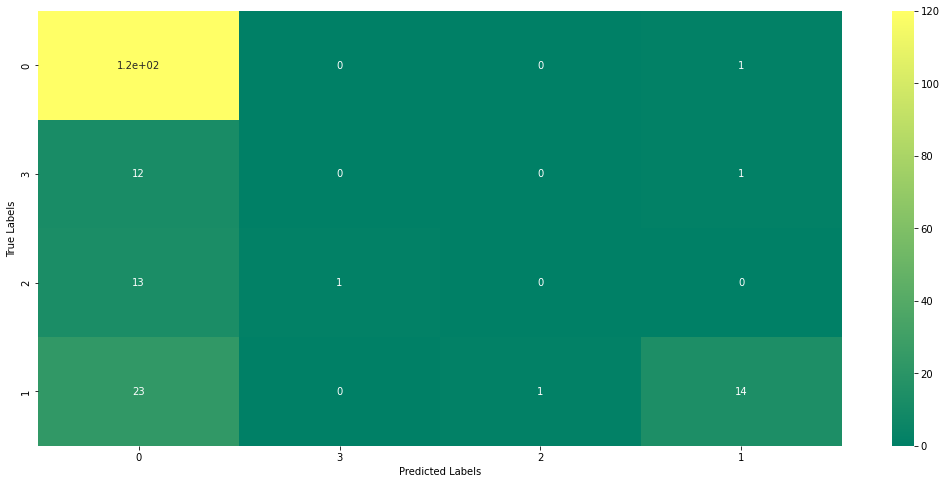

In [60]:
plt.figure(figsize = (18,8))
sns.heatmap(metrics.confusion_matrix(y_test, knn_pred), annot = True, xticklabels = y_test.unique(), yticklabels = y_test.unique(), cmap = 'summer')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [61]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred = gnb.fit(X_scaled, y_train).predict(X_testscaled)
print("NB Best model accuracy score on test data = {:.2f}".format(accuracy_score(y_test,y_pred)))

NB Best model accuracy score on test data = 0.15


In [62]:
from sklearn.linear_model import SGDClassifier
sgdc_param_grid = [{'penalty': ['l2', 'l1',],
                   'loss':['log_loss', 'log','modified_huber', 'squared_hinge', 'perceptron','huber']}]

sgdc_grid = GridSearchCV(SGDClassifier(max_iter=1000, tol=0.01), 
                    sgdc_param_grid, scoring='accuracy',
                    cv=5, return_train_score=True)

sgdc_grid.fit(X_scaled, y_train)
print("SGDC Best Parameter", sgdc_grid.best_params_)
sgdc_model = sgdc_grid.best_estimator_
sgdc1_pred=sgdc_model.predict(X_scaled)
sgdc_pred=sgdc_model.predict(X_testscaled)

print("SGDC Best model accuracy score on train data = {:.2f}".format(accuracy_score(y_train,sgdc1_pred)))
print("SGDC Best model accuracy score on test data = {:.2f}".format(accuracy_score(y_test,sgdc_pred)))

SGDC Best Parameter {'loss': 'huber', 'penalty': 'l1'}
SGDC Best model accuracy score on train data = 0.68
SGDC Best model accuracy score on test data = 0.68


In [63]:
cm = confusion_matrix(y_test, sgdc_pred)
print(cm) 

 

[[118   0   0   3]
 [ 13   0   0   0]
 [ 14   0   0   0]
 [ 30   0   0   8]]


In [64]:
cr = classification_report(y_test, sgdc_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.67      0.98      0.80       121
           1       0.00      0.00      0.00        13
           2       0.00      0.00      0.00        14
           3       0.73      0.21      0.33        38

    accuracy                           0.68       186
   macro avg       0.35      0.30      0.28       186
weighted avg       0.59      0.68      0.59       186



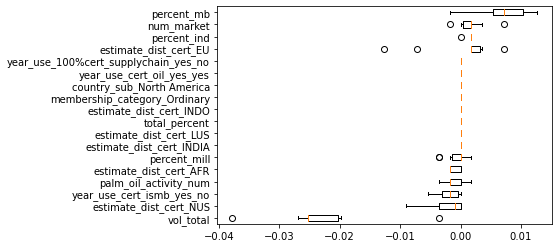

In [70]:
from sklearn.inspection import permutation_importance
result = permutation_importance(knn_model, X_dummy1, y_train, n_repeats=10, random_state=42)
perm_sorted_idx = result.importances_mean.argsort()


plt.boxplot(
    result.importances[perm_sorted_idx].T,
    vert=False,
    labels=X_dummy1.columns[perm_sorted_idx],
)

plt.show()

In [69]:
from sklearn.inspection import permutation_importance
r = permutation_importance(knn_model, X_dummy1, y_train,
                            n_repeats=30,
                            random_state=0)

for i in r.importances_mean.argsort()[::-1]:
     if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
         print(f"{X_dummy1.columns[i]:<10}"
               f"{r.importances_mean[i]:.3f}"
               f" +/- {r.importances_std[i]:.3f}")

percent_ind0.002 +/- 0.001


Important Features:
- 

In [56]:
# view the feature scores

feature_scores = pd.Series(rf_model.feature_importances_, index=X_dummy1.columns).sort_values(ascending=False)

feature_scores

total_percent                                                                             0.308851
vol_total                                                                                 0.229836
percent_mb                                                                                0.169679
estimate_dist_cert_EU                                                                     0.073298
num_market                                                                                0.031892
estimate_dist_cert_AFR                                                                    0.031403
membership_sector_Supply Chain Associate                                                  0.024826
membership_category_Ordinary                                                              0.022995
estimate_dist_cert_LUS                                                                    0.020089
year_use_cert_ismb_yes_no                                                                 0.014563
percent_in

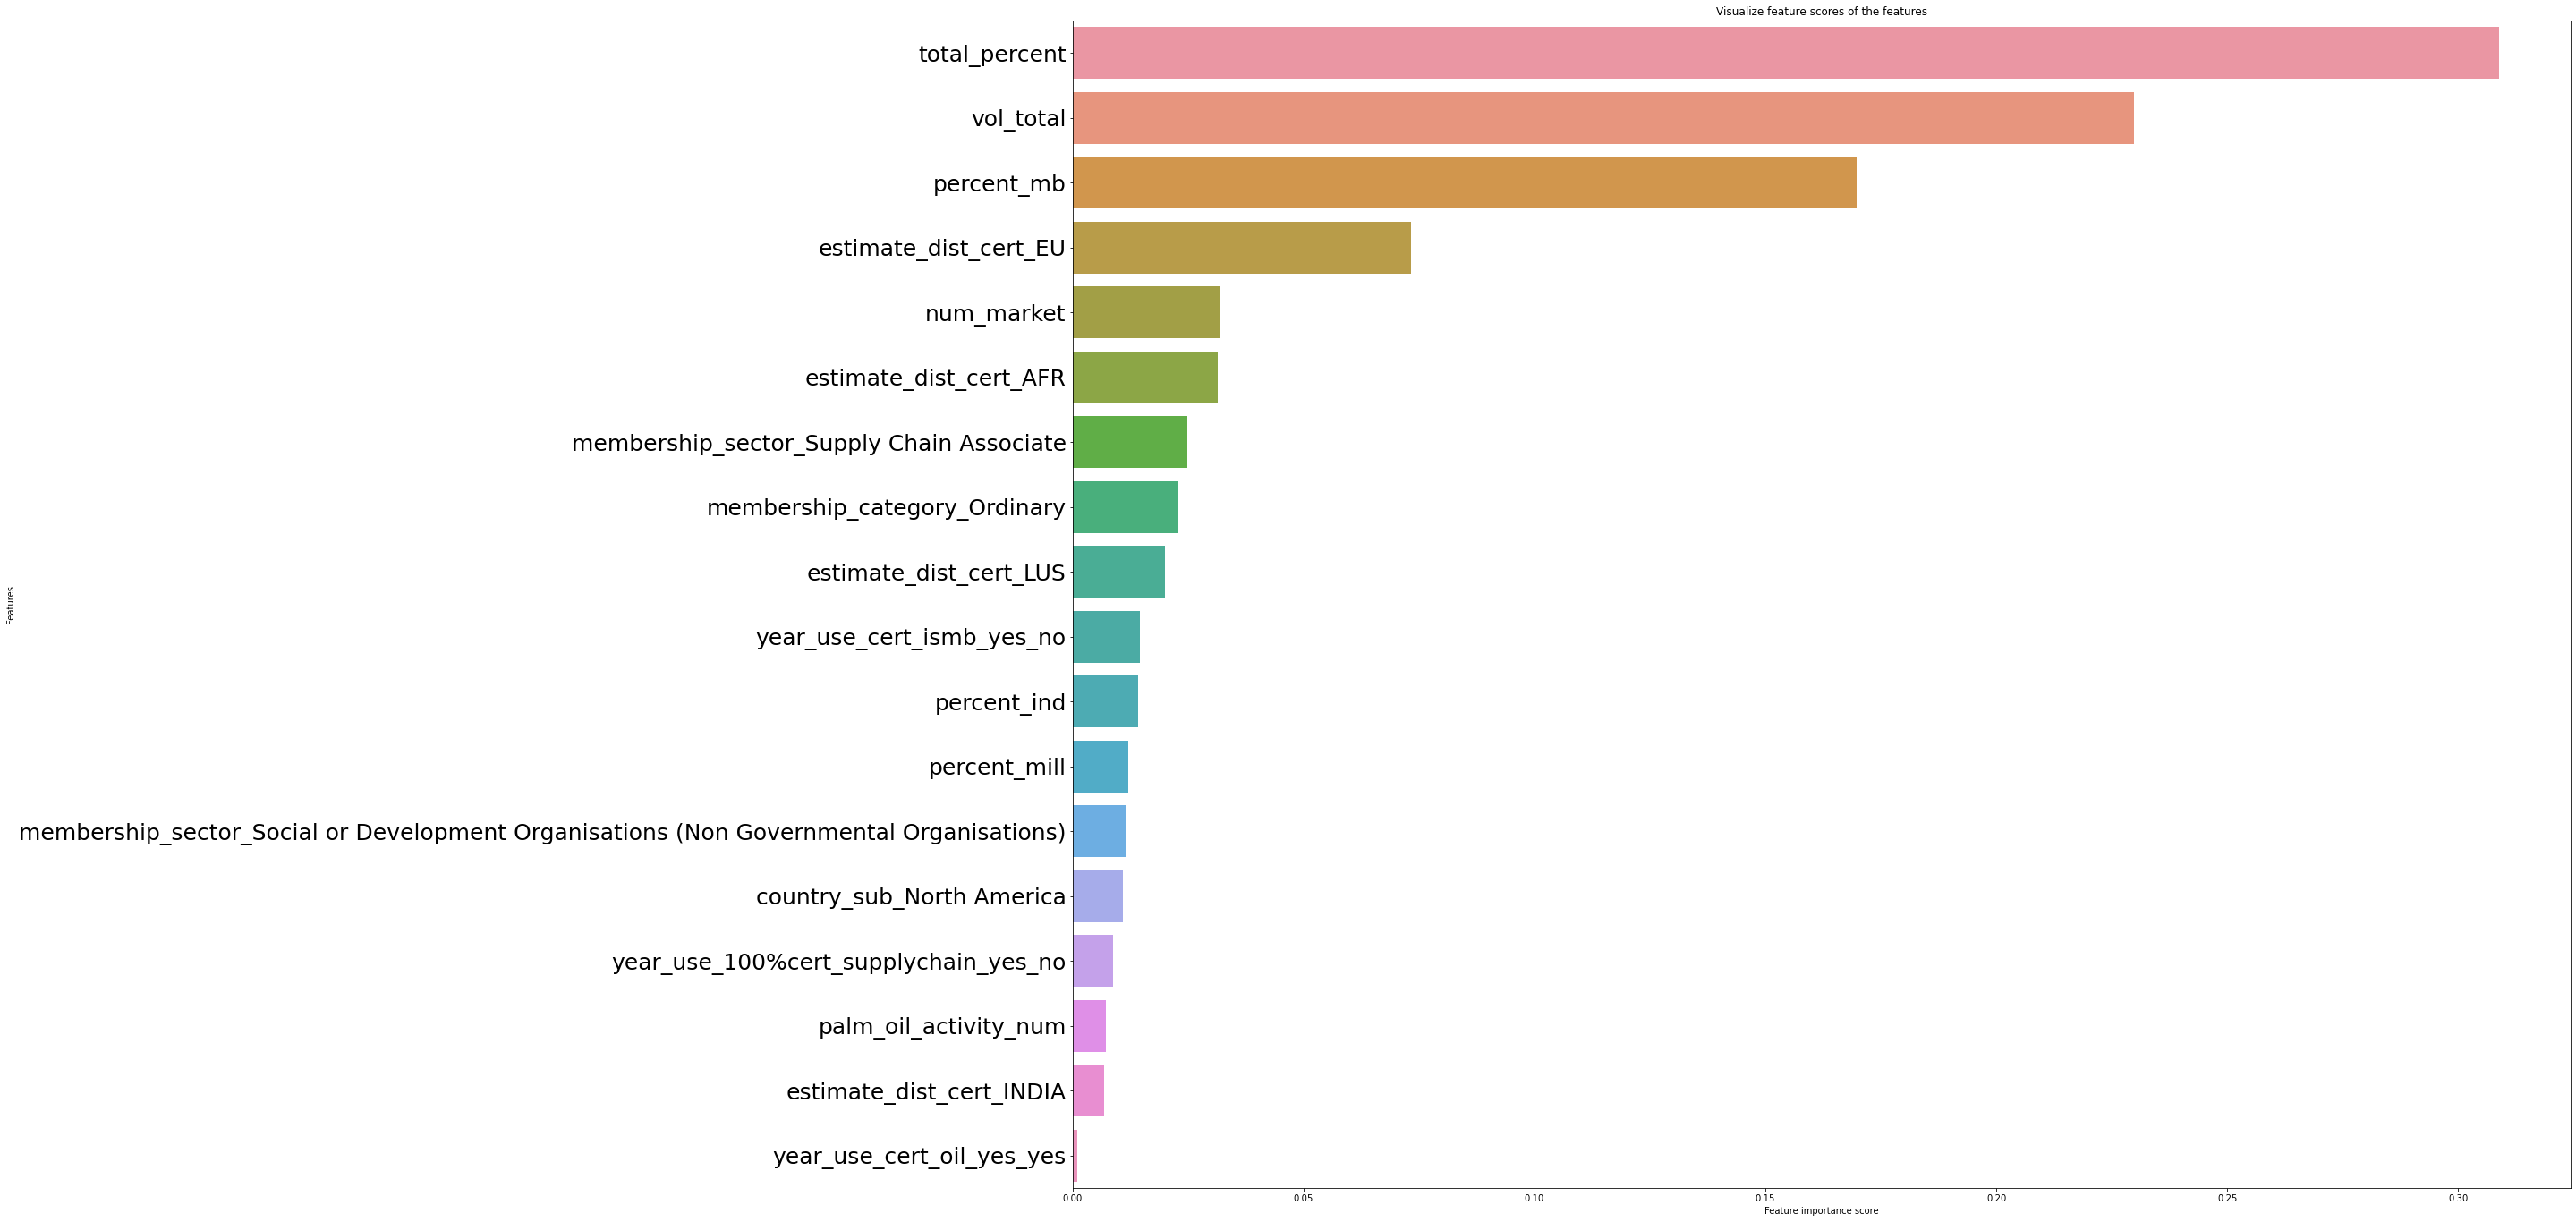

In [67]:
# Creating a seaborn bar plot

f, ax = plt.subplots(figsize=(30, 24))
ax = sns.barplot(x=feature_scores, y=feature_scores.index, data=df)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index,fontdict = { 'fontsize': 25})
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")

plt.show()

In [68]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'submission_status', 'member_name',
       'membership_num', 'membership_sector', 'membership_category', 'country',
       'use_palm_oil', 'select_descr_activity', 'palm_oil_activity',
       'palm_oil_activity2', 'subsidiary_palm_oil', 'market', 'declare_volume',
       'vol_palm_oil', 'vol_palm_kernel', 'vol_palm_kernel_expeller',
       'vol_palm_der/fraction', '%palm_oil_der/fract',
       '%palm_kernel_der/fract', 'estimate_dist_total_EU',
       'estimate_dist_total_NUS', 'estimate_dist_total_MY',
       'estimate_dist_total_INDO', 'estimate_dist_total_CH',
       'estimate_dist_total_INDIA', 'estimate_dist_total_LUS',
       'estimate_dist_total_AFR', 'estimate_dist_total_ROW',
       'vol_cert_mill_cspo', 'vol_cert_mill_cspko', 'vol_cert_mill_cspke',
       'vol_cert_mill_palm_der/fraction', 'vol_cert_ind_cspo',
       'vol_cert_ind_cspko', 'vol_cert_ind_cspke',
       'vol_cert_ind_palm_der/fraction', 'vol_cert_mb_cspo',
       'vol_cert_mb

In [ ]:
col = ['percent_mill', 'percent_ind', 'percent_mb', 'percent_sg', 'percent_ip','vol_total',
      'estimate_dist_cert_EU',
       'estimate_dist_cert_NUS', 'estimate_dist_cert_MY',
       'estimate_dist_cert_INDO', 'estimate_dist_cert_CH',
       'estimate_dist_cert_INDIA', 'estimate_dist_cert_LUS',
       'estimate_dist_cert_AFR', 'estimate_dist_cert_ROW',]